In [44]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import numpy as np 

In [45]:
df = pd.read_csv("output.csv")

In [46]:
df.sample(10)

,age,gender,height,weight,body_fat,diastolic,systolic,grip_force,bend_forward,sit_ups,broad_jump,class
9260,37.0,1,171.5,61.90,16.3,70.0,120.0,34.4,17.7,50.0,228.0,4
668,56.0,1,162.7,74.80,31.3,79.0,140.0,36.6,3.9,24.0,160.0,1
2150,30.0,1,181.3,97.36,24.2,88.0,145.0,43.6,19.6,51.0,245.0,2
4816,49.0,1,168.8,73.30,14.7,95.0,132.0,45.9,15.4,44.0,203.0,4
13062,35.0,0,168.4,61.88,22.7,96.0,150.0,31.2,24.2,36.0,179.0,4
1302,37.0,0,155.3,48.30,26.5,97.0,147.0,23.4,23.3,33.0,146.0,4
11817,45.0,1,171.4,71.30,18.3,89.0,127.0,44.4,13.9,40.0,231.0,3
5735,38.0,1,183.2,94.42,21.2,89.0,150.0,52.3,20.2,51.0,235.0,3
11589,62.0,1,167.0,71.10,32.8,87.0,143.0,37.8,19.0,30.0,171.0,3
11952,23.0,1,172.7,61.80,20.1,76.0,107.0,31.3,12.7,63.0,220.0,3


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13393 entries, 0 to 13392
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   age           13393 non-null  float64
 1   gender        13393 non-null  int64  
 2   height        13393 non-null  float64
 3   weight        13393 non-null  float64
 4   body_fat      13393 non-null  float64
 5   diastolic     13393 non-null  float64
 6   systolic      13393 non-null  float64
 7   grip_force    13393 non-null  float64
 8   bend_forward  13393 non-null  float64
 9   sit_ups       13393 non-null  float64
 10  broad_jump    13393 non-null  float64
 11  class         13393 non-null  int64  
dtypes: float64(10), int64(2)
memory usage: 1.2 MB


# Modelling

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay,roc_curve, auc, confusion_matrix

X = df.drop('class' , axis = 1)
y = df['class']

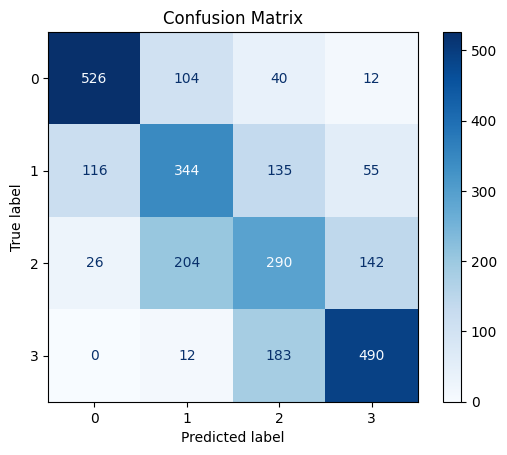

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # Veri setini eğitim ve test olarak ayırıyoruz (%80 eğitim, %20 test)
scaler = StandardScaler() # StandardScaler nesnesi oluşturuluyor (veriyi standardize etmek için)
scaled_X_train = scaler.fit_transform(X_train) # Eğitim verisi üzerinde scaler'ı fit (ortalamayı ve std'yi öğren) ve transform (uygula)
scaled_X_test = scaler.transform(X_test) # Test verisine yalnızca transform uygulanıyor (eğitimdeki ölçekle)
log_model = LogisticRegressionCV() # Lojistik regresyon modeli oluşturuluyor (çapraz doğrulama destekli)
log_model.fit(scaled_X_train , y_train) # Model, eğitim verisiyle eğitiliyor
y_pred = log_model.predict(scaled_X_test) # Eğitilen model, test verisi üzerinde tahmin yapıyor

cm = confusion_matrix(y_test, y_pred) # Gerçek değerlerle tahminleri karşılaştırarak confusion matrix oluşturuluyor
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')  # Renk paleti opsiyoneldir
plt.title("Confusion Matrix")
plt.show()

In [50]:
print("Confusion Matrix:\n", cm)

correct_predictions = np.trace(cm)  # np.trace → köşegen elemanların toplamı
print("Doğru tahmin sayısı:", correct_predictions)

total_predictions = np.sum(cm)  # Matrisin tüm elemanlarının toplamı
print("Toplam tahmin sayısı:", total_predictions)

# Accuracy oranını hesapla
accuracy = correct_predictions / total_predictions
print("Accuracy (manuel hesaplama):", accuracy)

# Alternatif: sklearn fonksiyonu ile hesapla (kontrol amaçlı)
accuracy_builtin = accuracy_score(y_test, y_pred)
print("Accuracy (accuracy_score ile):", accuracy_builtin)

Confusion Matrix:
 [[526 104  40  12]
 [116 344 135  55]
 [ 26 204 290 142]
 [  0  12 183 490]]
Doğru tahmin sayısı: 1650
Toplam tahmin sayısı: 2679
Accuracy (manuel hesaplama): 0.6159014557670772
Accuracy (accuracy_score ile): 0.6159014557670772


In [51]:
X = scaler.transform(X)
y_hat = log_model.predict(X)
df['model_predection'] = y_hat
df

,age,gender,height,weight,body_fat,diastolic,systolic,grip_force,bend_forward,sit_ups,broad_jump,class,model_predection
0,27.0,1,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,2,4
1,25.0,1,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,4,3
2,31.0,1,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,2,2
3,32.0,1,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,3,3
4,28.0,1,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,3,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13388,25.0,1,172.1,71.80,16.2,74.0,141.0,35.8,17.4,47.0,198.0,2,2
13389,21.0,1,179.7,63.90,12.1,74.0,128.0,33.0,1.1,48.0,167.0,1,1
13390,39.0,1,177.2,80.50,20.1,78.0,132.0,43.6,16.4,45.0,229.0,4,3
13391,64.0,0,146.1,57.70,40.4,68.0,121.0,19.3,9.2,0.0,75.0,1,1


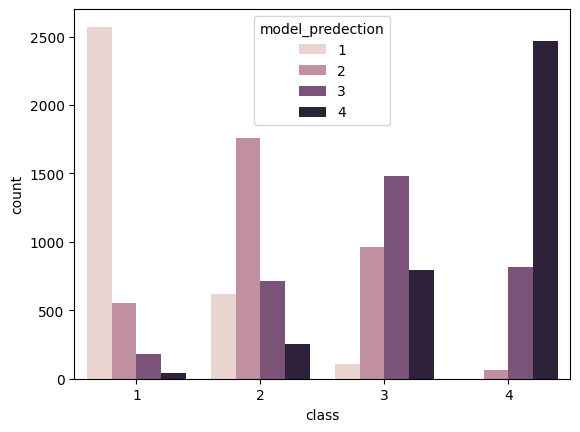

In [52]:
sns.countplot(data = df , x = 'class',hue = 'model_predection')
plt.savefig("logistic_regression_model_prediction.jpg", format="jpg", dpi=300)